<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


*   Extract information from a given web site
*   Write the scraped data into a csv file.


## Extract information from the given web site

You will extract the data from the below web site: <br>


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
# Your code here
from bs4 import BeautifulSoup
import requests


Download the webpage at the url


In [3]:
#your code goes here
data = requests.get(url).text

Create a soup object


In [4]:
#your code goes here
soup = BeautifulSoup(data, "html5lib")

Scrape the `Language name` and `annual average salary`.


In [5]:
#your code goes here
table = soup.find('table')
for row in table.find_all('tr'):
    cols = row.find_all('td')
    language_name = cols[1].getText()
    annual_avg_salary = cols[3].getText()
    


Save the scrapped data into a file named *popular-languages.csv*


In [6]:
# your code goes here
import csv
file = open('popular-languages.csv', 'w', newline='')
writer = csv.writer(file)
data = []
for row in table.find_all('tr'):
    cols = row.find_all('td')
    language_name = cols[1].getText()
    annual_avg_salary = cols[3].getText()
    data.append([language_name, annual_avg_salary])
writer.writerows(data)
file.close()



In [8]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
df = pd.read_csv('popular-languages.csv')

In [14]:
df = df.sort_values(by='Average Annual Salary', ascending=False)


/tmp/wsuser/ipykernel_132/2944215374.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['AVG Annual Salary'] = df['Average Annual Salary'].str.replace('$', '')


In [28]:
df['AVG Annual Salary'] = df['AVG Annual Salary'].str.replace(',', '')

In [30]:
df.drop(columns=['Average Annual Salary'])

,Language,AVG Annual Salary
9,Go,94082
2,R,92037
6,C#,88726
8,SQL,84793
7,PHP,84727
4,Swift,130801
0,Python,114383
5,C++,113865
3,Javascript,110981
1,Java,101013


In [31]:
df['AVG Annual Salary'] = df['AVG Annual Salary'].astype(int)

In [33]:
df = df.sort_values(by='AVG Annual Salary', ascending=False)

In [34]:
df.head(10)

,Language,Average Annual Salary,AVG Annual Salary
4,Swift,"$130,801",130801
0,Python,"$114,383",114383
5,C++,"$113,865",113865
3,Javascript,"$110,981",110981
1,Java,"$101,013",101013
9,Go,"$94,082",94082
2,R,"$92,037",92037
6,C#,"$88,726",88726
8,SQL,"$84,793",84793
7,PHP,"$84,727",84727


<AxesSubplot:xlabel='Language'>

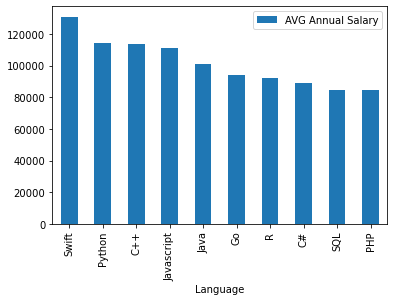

In [36]:
df.plot(kind='bar', x='Language', y='AVG Annual Salary')

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01).
